In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle as pkl

In [9]:
df = pd.read_csv('last.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,180,85,32,200,35.0,0.80,45,1
1,155,90,28,180,37.5,0.90,52,1
2,95,70,20,80,22.5,0.40,30,0
3,105,75,22,95,24.0,0.50,40,0
4,190,95,35,210,40.0,1.20,60,1
...,...,...,...,...,...,...,...,...
795,180,93,36,185,35.8,0.92,49,1
796,200,108,42,240,40.2,1.40,63,1
797,210,117,48,270,45.0,1.60,68,1
798,155,81,26,140,30.2,0.68,40,1


In [10]:
df.shape

(800, 8)

In [11]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   800 non-null    int64  
 1   BloodPressure             800 non-null    int64  
 2   SkinThickness             800 non-null    int64  
 3   Insulin                   800 non-null    int64  
 4   BMI                       800 non-null    float64
 5   DiabetesPedigreeFunction  800 non-null    float64
 6   Age                       800 non-null    int64  
 7   Outcome                   800 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


- Statistical analysis of the data

In [13]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000
mean,143.051250,84.491250,28.700000,148.12875,30.560750,0.759737,42.201250,0.500000
std,39.323008,15.003126,9.135881,68.62320,8.072366,0.380474,12.499542,0.500313
min,78.000000,58.000000,14.000000,50.00000,18.500000,0.200000,20.000000,0.000000
25%,107.000000,72.000000,21.000000,90.00000,24.200000,0.450000,30.000000,0.000000
50%,137.500000,82.000000,27.000000,135.00000,28.700000,0.670000,40.000000,0.500000
75%,175.000000,95.000000,35.000000,190.00000,36.700000,0.982500,53.000000,1.000000
max,219.000000,123.000000,51.000000,308.00000,48.400000,1.700000,68.000000,1.000000


In [14]:
target_vals = df['Outcome'].value_counts()
target_vals

Outcome
1    400
0    400
Name: count, dtype: int64

- 0 --> Non-diabetic patients
- 1 --> Diabetic patients

In [15]:
df.groupby('Outcome').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,108.2725,72.3250,21.245,88.9725,23.6475,0.456125,31.3675
1,177.8300,96.6575,36.155,207.2850,37.4740,1.063350,53.0350


- Above table shows that the mean of all the features is higher for diabetic patients than non-diabetic patients. This means that the diabetic patients have higher values of all the features than non-diabetic patients.

- Moreover, people with diabetes have much higher value of glucose and insulin than people without diabetes.

<Axes: >

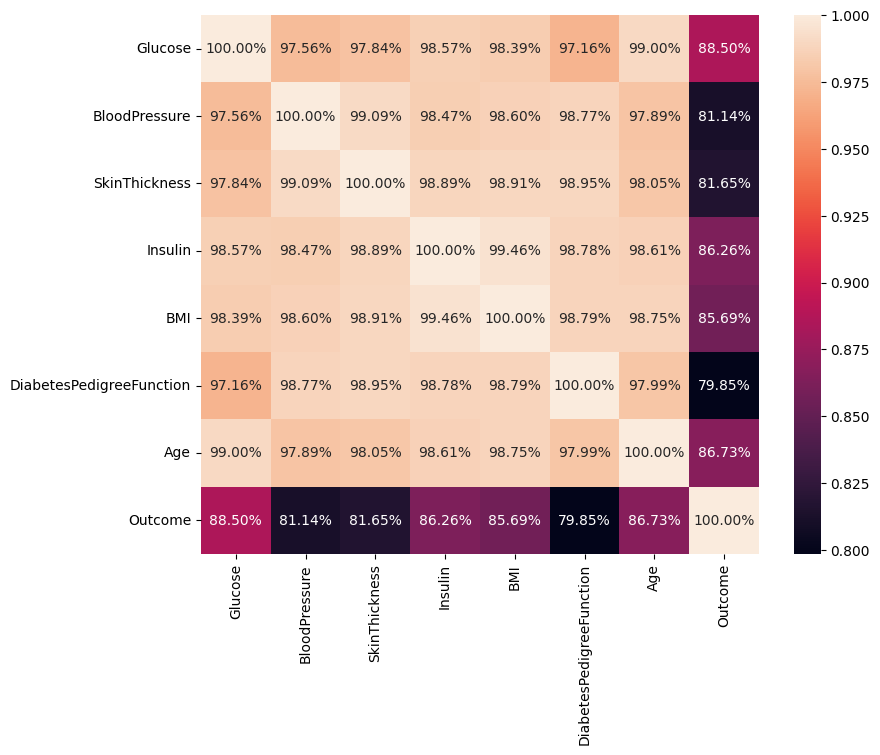

In [16]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2%')

- All the columns are moderately correlated

In [17]:
print("Percentage of patients without diabetes: " , round(target_vals[0]/len(df.Outcome), 2)*100)
print("Percentage of patients with diabetes: " , round(target_vals[1]/len(df.Outcome), 2)*100)

Percentage of patients without diabetes:  50.0
Percentage of patients with diabetes:  50.0


- Separating data and labels

In [18]:
x = df.drop(columns='Outcome', axis = 1)
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,180,85,32,200,35.0,0.8,45
1,155,90,28,180,37.5,0.9,52
2,95,70,20,80,22.5,0.4,30
3,105,75,22,95,24.0,0.5,40
4,190,95,35,210,40.0,1.2,60


In [19]:
y = df['Outcome']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Outcome, dtype: int64

- Data Standardization

In [20]:
scalar = StandardScaler()

In [21]:
scalar.fit(x)

StandardScaler()

In [22]:
standardized_data = scalar.transform(x)
standardized_data

array([[ 0.94020946,  0.03393081,  0.36143906, ...,  0.55027575,
         0.10588813,  0.22404828],
       [ 0.30405163,  0.36740318, -0.07666889, ...,  0.86016805,
         0.36888257,  0.78441915],
       [-1.22272715, -0.96648628, -0.9528848 , ..., -0.99918574,
        -0.9460896 , -0.97674643],
       ...,
       [ 1.70359885,  2.16815395,  2.11387088, ...,  1.78984495,
         2.2098436 ,  2.06526684],
       [ 0.30405163, -0.23284708, -0.29572287, ..., -0.04471746,
        -0.20970519, -0.17621662],
       [ 1.32190416,  1.23443133,  1.12812798, ...,  0.95933359,
         1.15786587,  1.18468405]])

In [23]:
pkl.dump(scalar, open('scaler.pkl', 'wb'))
# scalar

In [24]:
X = standardized_data
Y = df['Outcome']

- train test split


In [25]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, stratify=y, random_state = 2)

In [26]:
train_x.shape

(640, 7)

In [27]:
test_x.shape


(160, 7)

In [28]:
train_y.shape

(640,)

In [29]:

test_y.shape


(160,)

- Model Training

- LOGISTIC REGRESSION


In [30]:
lr = LogisticRegression()
lr = lr.fit(train_x, train_y)
lr

LogisticRegression()

In [31]:
logistic_train_pred = lr.predict(train_x)
logistic_test_pred = lr.predict(test_x)

In [32]:
print("Logistic Regression Training Accuracy: ", round(accuracy_score(train_y, logistic_train_pred), 2)*100)
print("Logistic Regression Testing Accuracy: ", round(accuracy_score(test_y, logistic_test_pred), 2)*100)

Logistic Regression Training Accuracy:  100.0
Logistic Regression Testing Accuracy:  100.0


In [33]:
pkl.dump(lr, open('lr.pkl', 'wb'))
# lr

- KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_x, train_y)


KNeighborsClassifier(n_neighbors=50)

In [35]:
knn_train_pred = knn.predict(train_x)
knn_test_pred = knn.predict(test_x)

In [36]:
print("KNN Training Accuracy: ", round(accuracy_score(train_y, knn_train_pred), 2)*100)
print("KNN Testing Accuracy: ", round(accuracy_score(test_y, knn_test_pred), 2)*100)

KNN Training Accuracy:  100.0
KNN Testing Accuracy:  100.0


- Decision Trees

In [37]:
max_accuracy = 0   
for i in range(2000):
    clf = DecisionTreeClassifier(random_state = i)
    clf.fit(train_x, train_y)
    pred = clf.predict(test_x)
    current_accuracy = round(accuracy_score(pred, test_y)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_random_state = i

# print("Best Random State: ", best_random_state)
# print("Best Accuracy: ", max_accuracy)

clf = DecisionTreeClassifier(random_state = best_random_state)
clf.fit(train_x, train_y)

DecisionTreeClassifier(random_state=0)

[Text(0.5, 0.75, 'x[4] <= -0.231\ngini = 0.5\nsamples = 640\nvalue = [320, 320]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 320\nvalue = [320, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 320\nvalue = [0, 320]')]

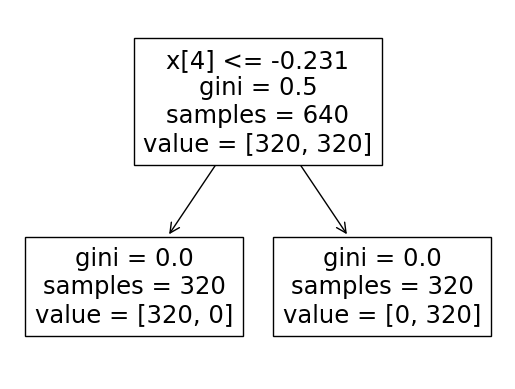

In [38]:
tree.plot_tree(clf)

In [39]:
decision_train_pred = clf.predict(train_x)
decision_test_pred = clf.predict(test_x)

In [40]:
print("Decision Tree Training Accuracy: ", round(accuracy_score(train_y, decision_train_pred), 2)*100)
print("Decision Tree Testing Accuracy: ", round(accuracy_score(test_y, decision_test_pred), 2)*100)

Decision Tree Training Accuracy:  100.0
Decision Tree Testing Accuracy:  100.0



- Random Forest

In [41]:
rf = RandomForestClassifier(n_estimators=500, random_state = best_random_state)

In [42]:
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, random_state=0)

In [43]:
rf_train_pred = rf.predict(train_x)
rf_test_pred = rf.predict(test_x)

In [44]:
print("Random Forest Training Accuracy: ", round(accuracy_score(train_y, rf_train_pred), 2)*100)
print("Random Forest Testing Accuracy: ", round(accuracy_score(test_y, rf_test_pred), 2)*100)

Random Forest Training Accuracy:  100.0
Random Forest Testing Accuracy:  100.0


- SVM

In [45]:
classifier = SVC(kernel = 'linear')
classifier.fit(train_x, train_y)


SVC(kernel='linear')

In [46]:
print("SVM Training Accuracy: ", round(classifier.score(train_x, train_y)*100, 2))
print("SVM Testing Accuracy: ", round(classifier.score(test_x, test_y)*100, 2))

SVM Training Accuracy:  100.0
SVM Testing Accuracy:  100.0


In [47]:
input_data = (10,139,80,0,0,27.1,1.441,57)
data = np.array(input_data)
data

array([ 10.   , 139.   ,  80.   ,   0.   ,   0.   ,  27.1  ,   1.441,
        57.   ])

In [42]:
std_data = scalar.transform(data.reshape(1, -1))

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but StandardScaler is expecting 7 features as input.

In [43]:
prediction = nb.predict(std_data)
prediction

NameError: name 'nb' is not defined

In [44]:
if prediction == 1:
    print("The patient has diabetes")
else:
    print("The patient does not have diabetes")

NameError: name 'prediction' is not defined

In [48]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 0, 'SkinThickness')

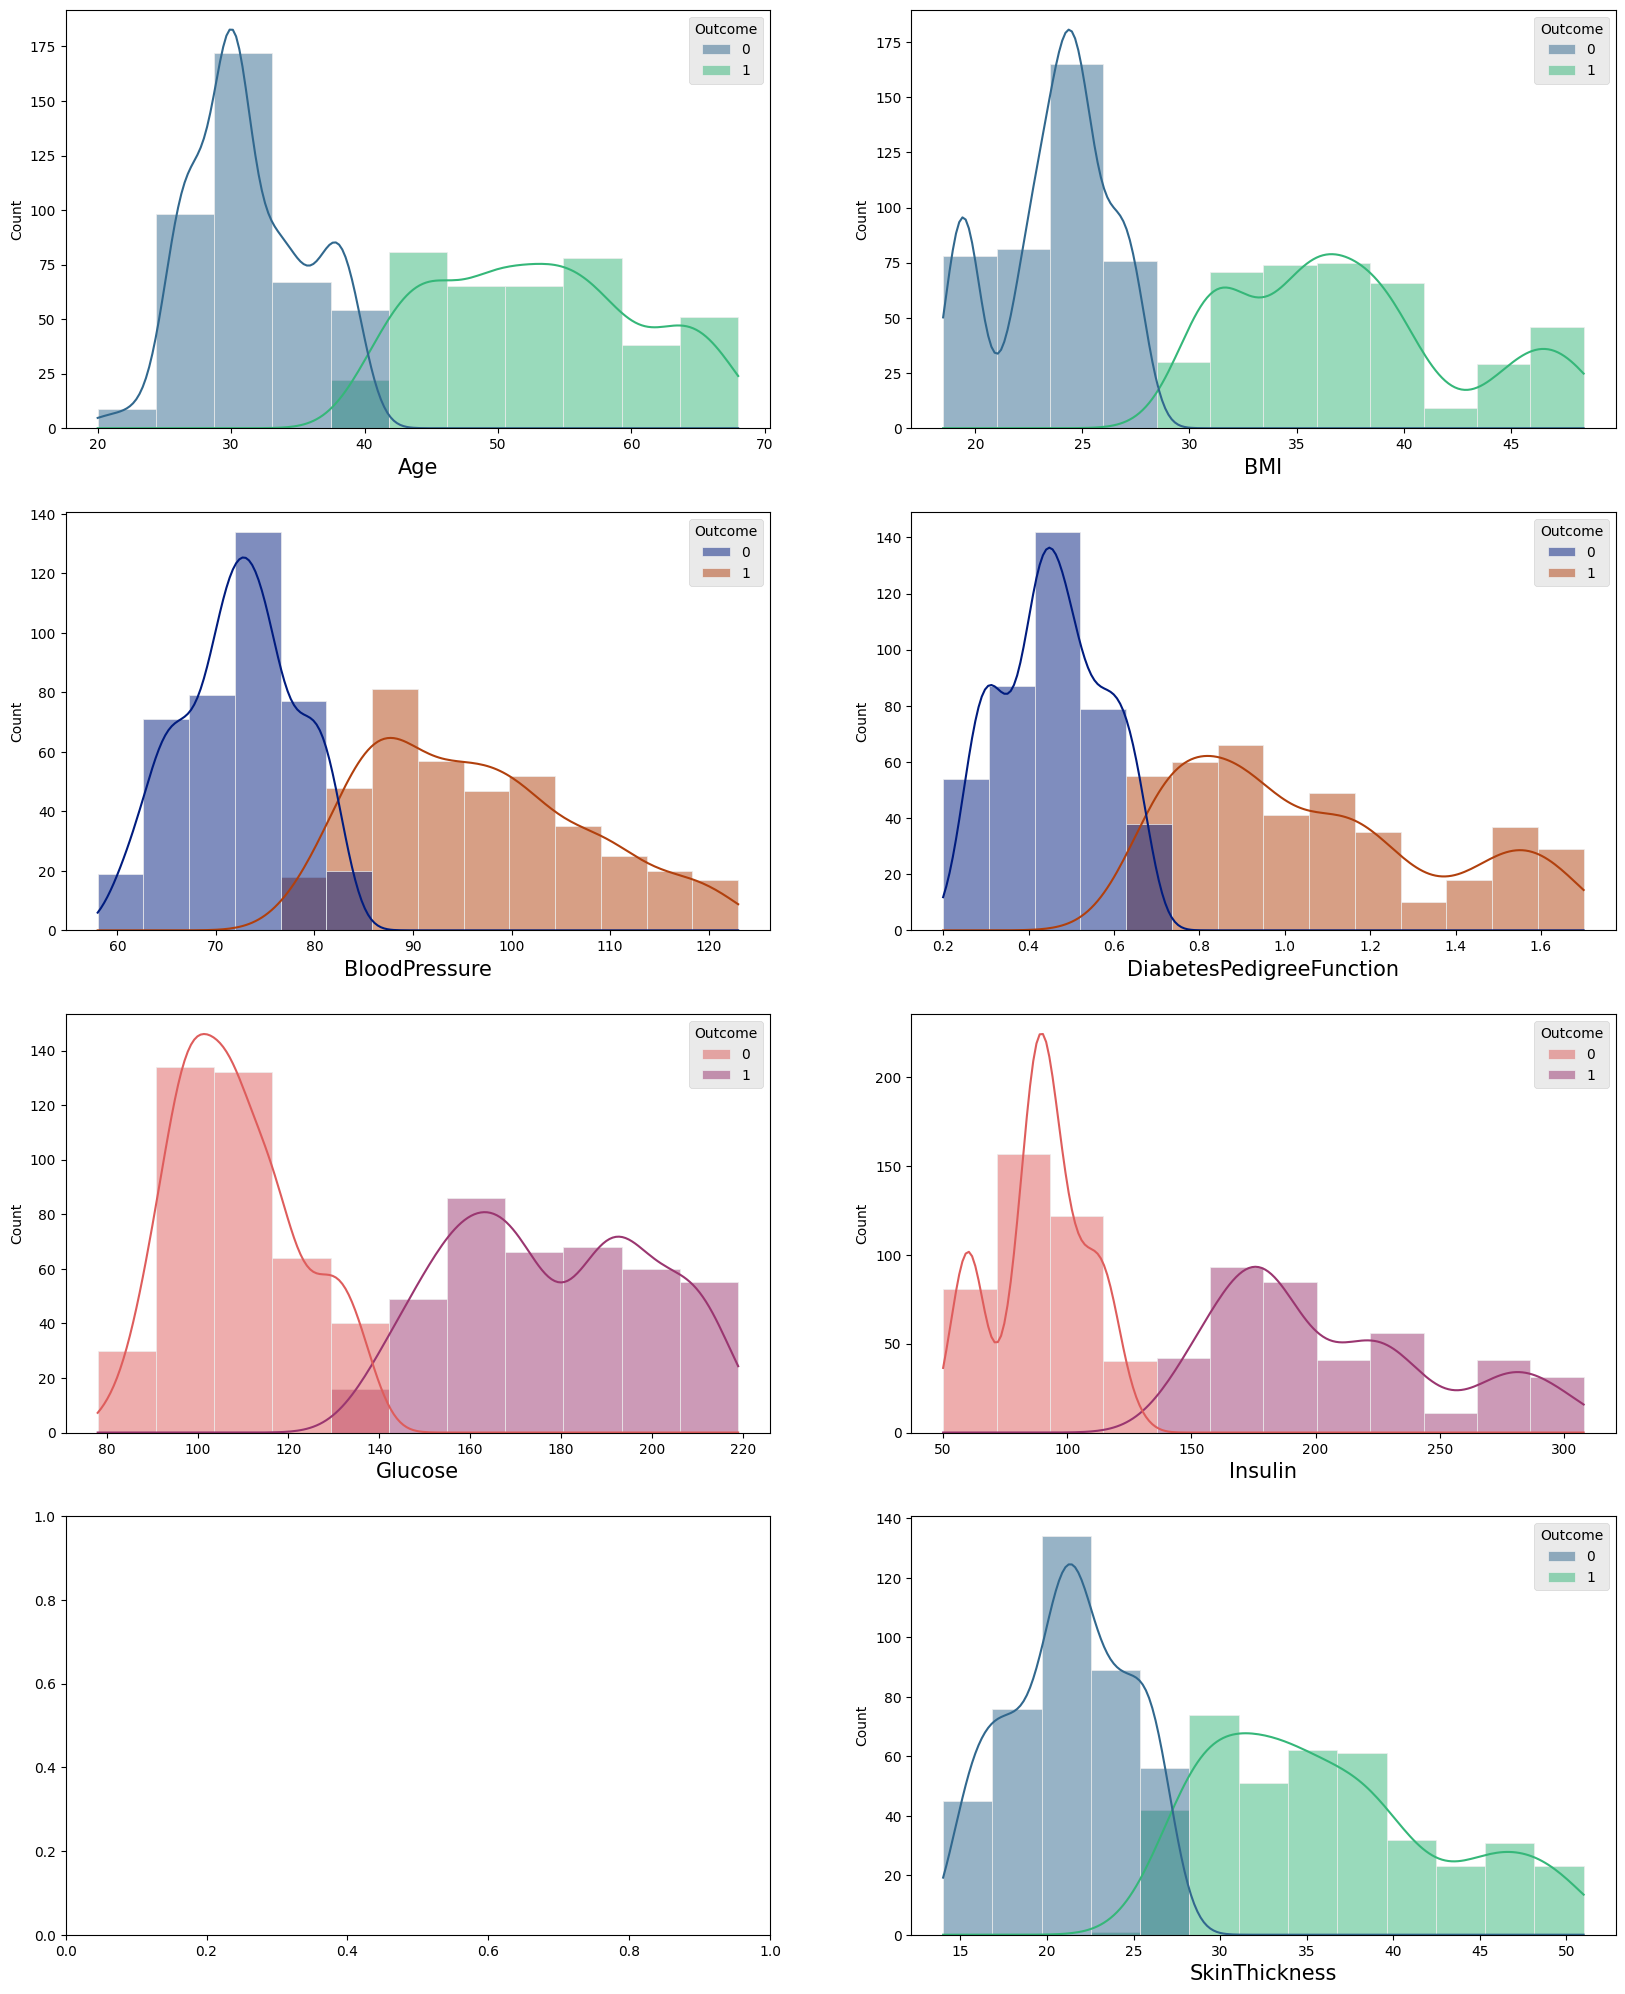

In [49]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
plt.style.use('ggplot')

sns.histplot(x = df['Age'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 0])
ax[0,0].set_xlabel('Age', fontsize = 15)

sns.histplot(x = df['BMI'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 1])
ax[0,1].set_xlabel('BMI', fontsize = 15)


sns.histplot(x = df['BloodPressure'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 0])
ax[1,0].set_xlabel('BloodPressure', fontsize = 15)

sns.histplot(x = df['DiabetesPedigreeFunction'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 1])
ax[1,1].set_xlabel('DiabetesPedigreeFunction', fontsize = 15)


sns.histplot(x = df['Glucose'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 0])
ax[2,0].set_xlabel('Glucose', fontsize = 15)

sns.histplot(x = df['Insulin'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 1])
ax[2,1].set_xlabel('Insulin', fontsize = 15)




sns.histplot(x = df['SkinThickness'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[3, 1])
ax[3,1].set_xlabel('SkinThickness', fontsize = 15)


In [11]:
cf_matrix = confusion_matrix(test_y, rf_test_pred)
cf_matrix

# Order: TN, FP, FN, TP 

NameError: name 'test_y' is not defined

In [47]:
tn, fp, fn, tp = cf_matrix.ravel()
print(tn, fp, fn, tp)

# Ravel function is used to extract the confusion matrix values

NameError: name 'cf_matrix' is not defined

In [10]:
sns.heatmap(cf_matrix, annot=True)

# Annot displays labels

NameError: name 'cf_matrix' is not defined

In [162]:
precision_recall_fscore_support(test_y, naive_test_pred, average = 'macro')

(0.7568615126754661, 0.727037037037037, 0.736649240240387, None)

In [163]:
pkl.dump(nb, open('nb.pkl', 'wb'))
# nb

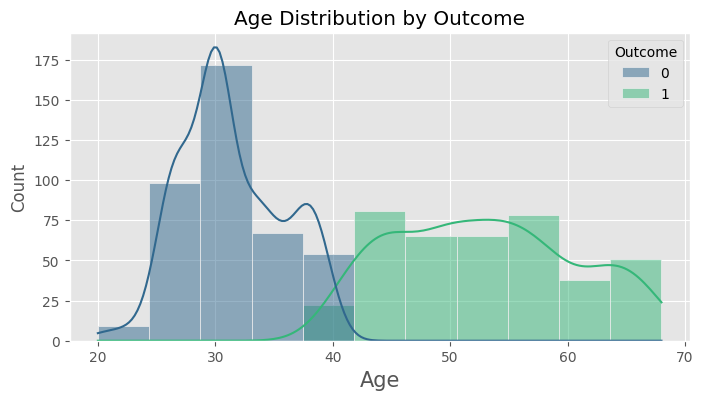

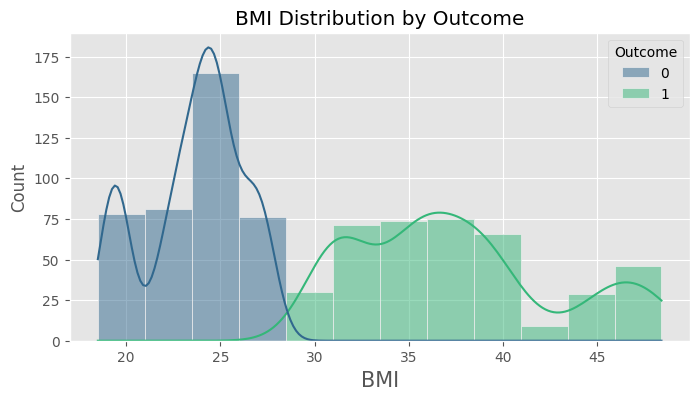

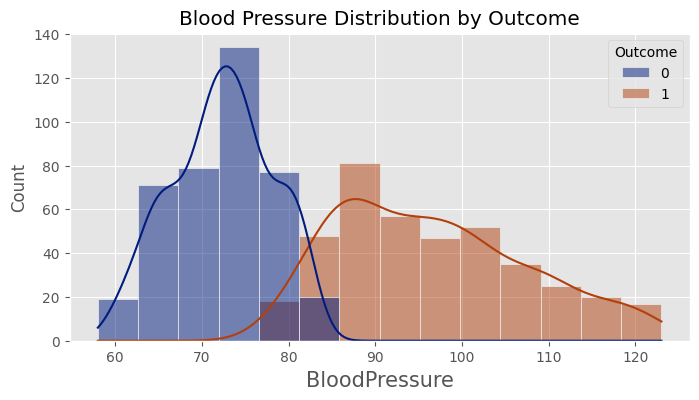

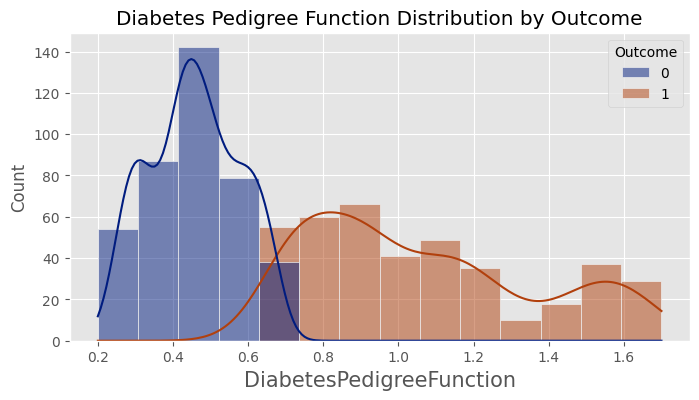

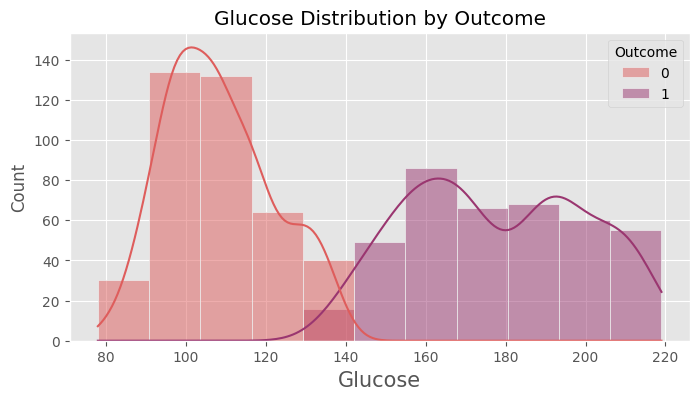

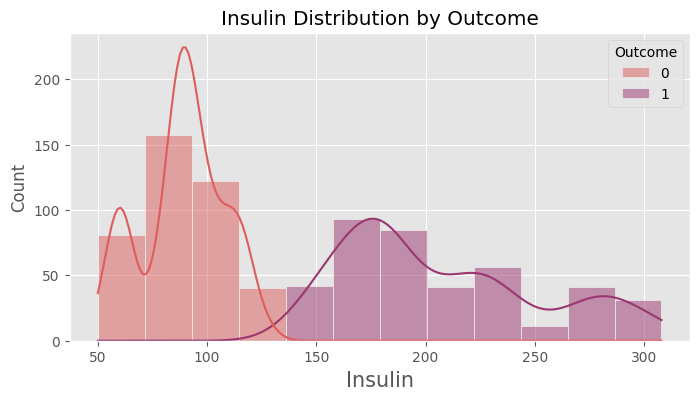

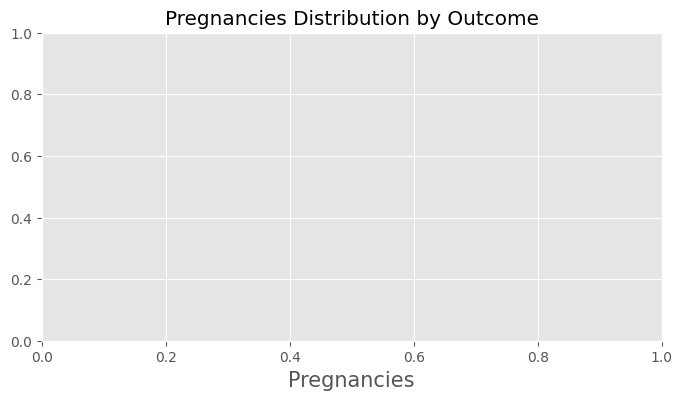

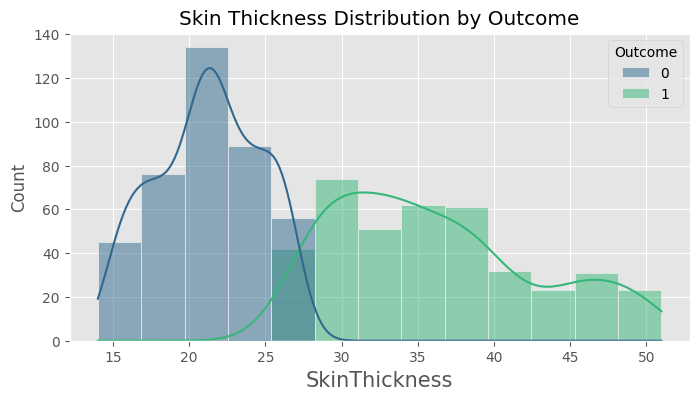

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Plot for Age
plt.figure(figsize=(8, 4))
sns.histplot(x=df['Age'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('Age', fontsize=15)
plt.title('Age Distribution by Outcome')
plt.show()

# Plot for BMI
plt.figure(figsize=(8, 4))
sns.histplot(x=df['BMI'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('BMI', fontsize=15)
plt.title('BMI Distribution by Outcome')
plt.show()

# Plot for BloodPressure
plt.figure(figsize=(8, 4))
sns.histplot(x=df['BloodPressure'], hue=df['Outcome'], palette="dark", kde=True)
plt.xlabel('BloodPressure', fontsize=15)
plt.title('Blood Pressure Distribution by Outcome')
plt.show()

# Plot for DiabetesPedigreeFunction
plt.figure(figsize=(8,4))
sns.histplot(x=df['DiabetesPedigreeFunction'], hue=df['Outcome'], palette="dark", kde=True)
plt.xlabel('DiabetesPedigreeFunction', fontsize=15)
plt.title('Diabetes Pedigree Function Distribution by Outcome')
plt.show()

# Plot for Glucose
plt.figure(figsize=(8,4))
sns.histplot(x=df['Glucose'], hue=df['Outcome'], palette="flare", kde=True)
plt.xlabel('Glucose', fontsize=15)
plt.title('Glucose Distribution by Outcome')
plt.show()

# Plot for Insulin
plt.figure(figsize=(8,4))
sns.histplot(x=df['Insulin'], hue=df['Outcome'], palette="flare", kde=True)
plt.xlabel('Insulin', fontsize=15)
plt.title('Insulin Distribution by Outcome')
plt.show()

# Plot for Pregnancies
plt.figure(figsize=(8,4))

plt.xlabel('Pregnancies', fontsize=15)
plt.title('Pregnancies Distribution by Outcome')
plt.show()

# Plot for SkinThickness
plt.figure(figsize=(8,4))
sns.histplot(x=df['SkinThickness'], hue=df['Outcome'], palette="viridis", kde=True)
plt.xlabel('SkinThickness', fontsize=15)
plt.title('Skin Thickness Distribution by Outcome')
plt.show()
